# Customer Analysis

In [1]:
### import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns',None)
%matplotlib inline

## Who are the top buyers contributing to sales revenue

In [3]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
customers_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Customers.xlsx"

sales_df = pd.read_excel(sales_path)
customers_df = pd.read_excel(customers_path)

# Merge Sales and Customers datasets on CustomerKey
merged_data = pd.merge(sales_df, customers_df, on='CustomerKey', how='inner')

# Group by FullName and sum SalesAmount
buyer_revenue = merged_data.groupby('FullName')['SalesAmount'].sum().reset_index()

# Sort by SalesAmount in descending order
top_buyers = buyer_revenue.sort_values(by='SalesAmount', ascending=False)

# Display top 10 buyers
print("Top 10 Buyers Contributing to Revenue:")
top_buyers.head(10)

Top 10 Buyers Contributing to Revenue:


,FullName,SalesAmount
15675,"Turner, Jordan",15999.0996
17061,"Xu, Willie",13490.0596
9805,"Nara, Nichole",13295.3800
5637,"Henderson, Kaitlyn",13294.2700
5546,"He, Margaret",13269.2700
3506,"Dominguez, Randall",13265.9900
4622,"Gonzalez, Adriana",13242.7000
6090,"Hu, Rosa",13215.6500
4226,"Gill, Brandi",13195.6400
14163,"She, Brad",13173.1900


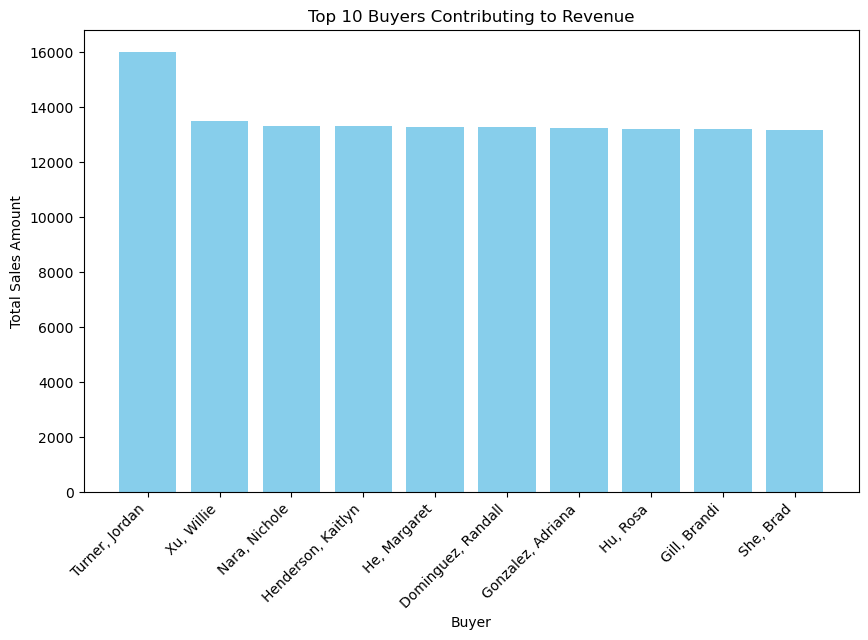

In [4]:
# Top 10 buyers
top_10_buyers = top_buyers.head(10)

# Bar chart of top 10 buyers
plt.figure(figsize=(10, 6))
plt.bar(top_10_buyers['FullName'], top_10_buyers['SalesAmount'], color='skyblue')
plt.title('Top 10 Buyers Contributing to Revenue')
plt.xlabel('Buyer')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

## What are the most common customer demographics or characteristics

Index(['CustomerKey', 'FirstName', 'LastName', 'FullName', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase',
       'CommuteDistance'],
      dtype='object')
Marital Status Distribution:
M    10011
S     8473
Name: MaritalStatus, dtype: int64


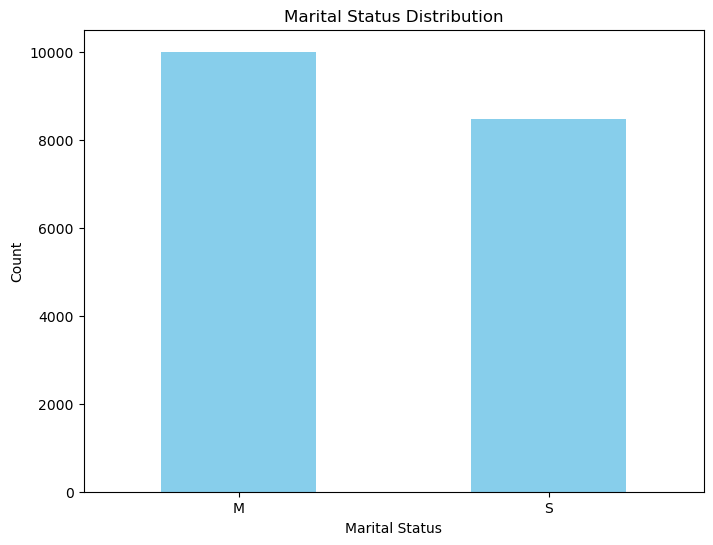


Gender Distribution:
M    9351
F    9133
Name: Gender, dtype: int64


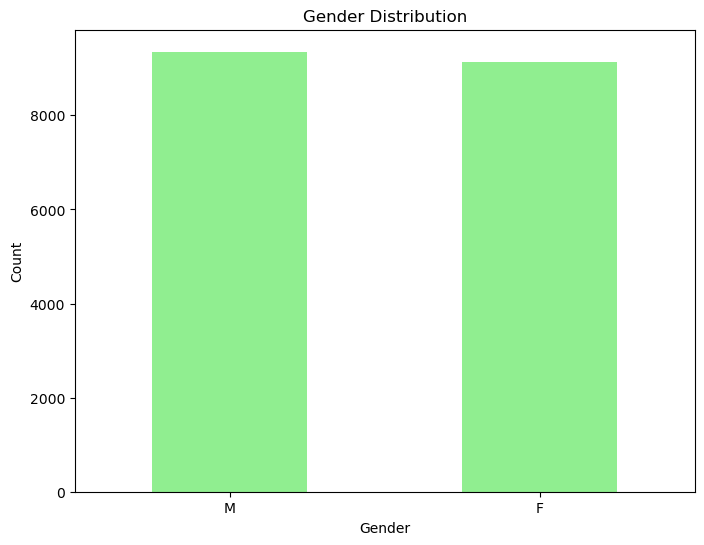


Yearly Income Statistics:
count     18484.000000
mean      57305.777970
std       32285.841703
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: YearlyIncome, dtype: float64


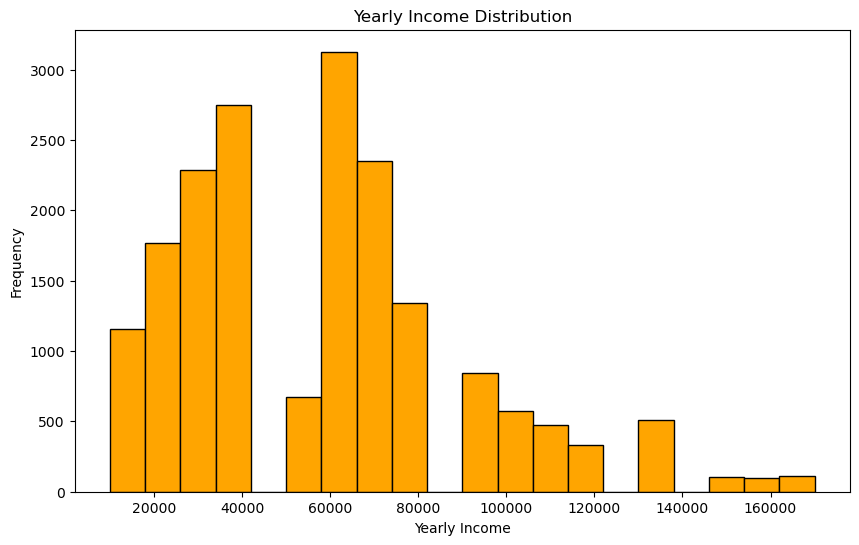

In [7]:
# Load Customers dataset
customers_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Customers.xlsx"
customers_df = pd.read_excel(customers_path)

# Check demographic columns
print(customers_df.columns)

# Analyze MaritalStatus distribution
marital_status_dist = customers_df['MaritalStatus'].value_counts()
print("Marital Status Distribution:")
print(marital_status_dist)

# Analyze Gender distribution
gender_dist = customers_df['Gender'].value_counts()

# Analyze YearlyIncome statistics
yearly_income_stats = customers_df['YearlyIncome'].describe()


# Plot Marital Status distribution
plt.figure(figsize=(8, 6))
marital_status_dist.plot(kind='bar', color='skyblue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


print("\nGender Distribution:")
print(gender_dist)

# Plot Gender distribution
plt.figure(figsize=(8, 6))
gender_dist.plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("\nYearly Income Statistics:")
print(yearly_income_stats)

# Plot Yearly Income distribution
plt.figure(figsize=(10, 6))
plt.hist(customers_df['YearlyIncome'], bins=20, color='orange', edgecolor='black')
plt.title('Yearly Income Distribution')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()

## What is the retention rate of returning customers

In [8]:
# Load Sales dataset
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
sales_df = pd.read_excel(sales_path)

# Check data structure
print(sales_df.columns)

# Group by CustomerKey and count purchases
customer_purchases = sales_df.groupby('CustomerKey').size().reset_index(name='PurchaseCount')

# Classify customers as Returning or New
customer_purchases['CustomerType'] = customer_purchases['PurchaseCount'].apply(
    lambda x: 'Returning' if x > 1 else 'New'
)

# Calculate the number of Returning and New customers
customer_counts = customer_purchases['CustomerType'].value_counts()
print("\nCustomer Counts:")
print(customer_counts)

# Calculate retention rate
retention_rate = (customer_counts['Returning'] / customer_counts.sum()) * 100
print(f"\nCustomer Retention Rate: {retention_rate:.2f}%")

# Display the result
print("\nSummary:")
print(customer_purchases.head())

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18', 'StandardCost',
       'List Price', 'diif std cost', 'diff list price'],
      dtype='object')

Customer Counts:
Returning    15472
New           2446
Name: CustomerType, dtype: int64

Customer Retention Rate: 86.35%

Summary:
   CustomerKey  PurchaseCount CustomerType
0        11000              8    Returning
1        11001             11    Returning
2        11002              4    Returning
3        11003              9    Returning
4        11004              6    Returning


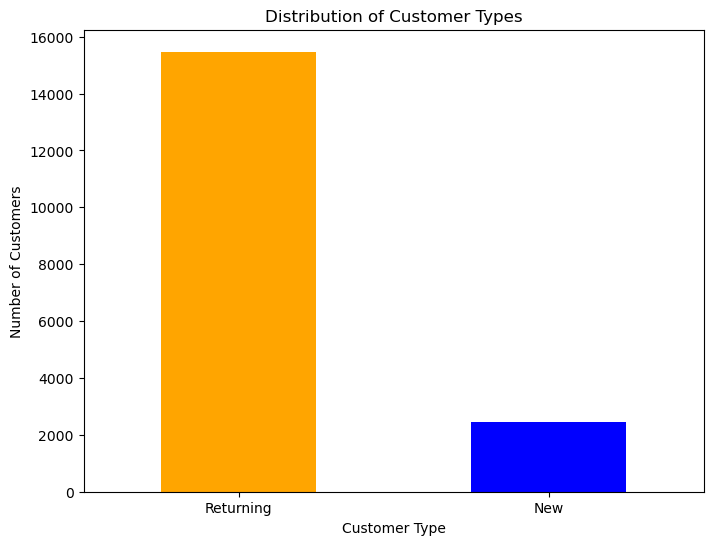

In [9]:
# Plot distribution of customer types
customer_counts.plot(kind='bar', color=['orange', 'blue'], figsize=(8, 6))
plt.title('Distribution of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()